Plano de hoje
-------------

1. Ambiente de programação
2. Usando o computador para calcular    
3. Usando o computador para desenhar
4. Usando o computador para integrar: quadraturas
    1. Primeiras aproximações: Fórmula do ponto médio e dos trapézios (Seções 4.3.1 e 4.3.2)
    1. Melhores aproximações: Fórmula de Simpson e métodos iterativos (Seções 4.3.3 e 4.5)
    1. Outros métodos: Monte-Carlo e variantes de Gauss (Seções 4.4 e 4.6)

In [1]:
sys.path.append('..')
import integrals as IM

# Método de Monte-Carlo

As fórmulas que vimos nas seções anteriores são especiais para integrais unidimensionais.
O que acontece se a dimensão aumenta?
Por exemplo, como calcular
$$ \int \sin(x+y)\cos(x-y) \, dx dy \quad \text{no quadrado $[0,1]\times [0,1]$?}$$

Podemos manter as idéias principais: dividir o quadrado em quadradinhos menores,
em cada um, tomar uma aproximação dependendo de alguns valores da função,
esperar que a continuidade (os a derivabilidade) da função integrada garanta uma certa convergência,
etc, etc, etc.

Mas existe um ponto de vista radicalmente diferente: o método de Monte-Carlo.
Em vez de seguir os pontos de forma regular, o método de Monte-Carlo usa pontos escolhidos aleatoriamente
no domínio de integração.
Isso pode parecer muito ineficiente (e, realmente, é),
mas pode ser melhor do que manter os procedimentos anteriores.
Vejamos em alguns casos porquê isso pode acontecer.

## 1) A função integrada pode ser "muito feia".

Os métodos que vimos dependem de a função ser "regular" para convergir "rápido".
Se a função for descontínua, não derivável, etc., os métodos _degradam_:
ou param de convergir, ou convergem mais lentamente.

In [2]:
def disc(x):
    xmod2 = fmod(x,2)
    if xmod2 < 1: xmod2 -= 1
    xmod3 = fmod(x,pi)
    return xmod2 + xmod3

In [3]:
def disc_v(x):
    xmod2 = fmod(x,2)
    x_bool = xmod2 < 1
    xmod2[x_bool] = xmod2[x_bool] - 1
    xmod3 = fmod(x,pi)
    return xmod2 + xmod3

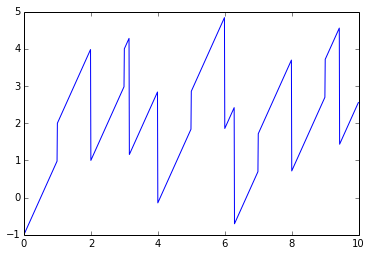

In [4]:
x = arange(0,10,0.01)
plot(x, disc_v(x))

In [5]:
Iexact = 5 + (3*pi**2 + (10 - 3*pi)**2)/2

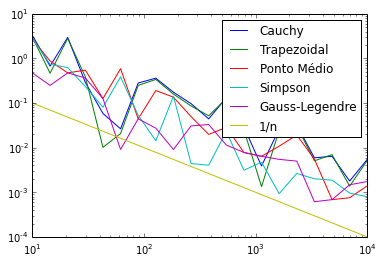

In [6]:
methods = [(IM.cauchy, 'Cauchy'), (IM.trapez, 'Trapezoidal'), (IM.midpoint, 'Ponto Médio'),
           (IM.simpson, 'Simpson'), (IM.GaussLeg1, 'Gauss-Legendre')]

ns = logspace(1,4,20)
for m, mname in methods:
    err = []
    for n in ns:
        I = m(disc,0,10, int(n))
        err.append(abs(I - Iexact))
    loglog(ns, err, label=mname)

loglog(ns, 1/ns, label='1/n')
legend(loc=0);

## 2) O domínio de integração pode ser "muito feio".

Integrar em 1 dimensão é fácil: basta determinar os extremos dos intervalos.
Mas integrar em mais dimensões é um problema mais chato:
temos regiões de integração que podem ser simples (círculos, quadrados, ...)
ou extremamente complicadas (interior de uma curva, ...).

Como dividir uma região complicada?
O que fazer com os pedacinhos do bordo?

## 3) Interpolar é mais custoso em maior dimensão.

Se queremos achar uma parábola que aproxima uma dada função,
basta tomarmos três pontos, e temos uma aproximação de grau dois.

Se tivermos uma função com 3 variáveis, um polinômio de segundo grau terá 10 coeficientes:
$$ Ax^2 + By^2 + Cz^2 + Dxy + Exz + Fyz + Gx + Hy + Iz + J. $$

Assim, precisamos de 10 pontos para achar este polinômio.
E achar os 10 coeficientes requer resolver um sistema linear $10 \times 10$.
E como escolher os 10 pontos dentro de um cubo?
A forma natural, simétrica, tem 8 vértices... podemos botar um a mais no centro,
e como fazer para o 10º?

## Uma outra idéia: o método de Monte-Carlo

A idéia básica do método de Monte-Carlo é usar pontos aleatórios do domínio de $f$ para calcular a integral.
Podemos ver isso da seguinte forma:

- A média da função é dada pela integral dividida pelo seu domínio:
    $$ \text{média}(f) = \frac{\int_D f}{|D|} $$.
- Mas podemos também calcular esta média de forma amostral:
    $$ \text{média amostral}(f) = \frac{\sum _ {i=1}^N f(x_i)}{N} $$.

A primeira é o que queremos calcular, enquanto que a segunda é fácil de calcular no computador.
A [Lei (Forte) dos Grandes Números][1]
garante que a média amostral converge para a média "de verdade".

Mais ainda, o [Teorema central do limite][2]
mostra que, sob certas hipóteses
(muitas vezes verificadas, mesmo que $f$ seja descontínua!)
o erro de aproximação decresce com a raiz quadrada de $N$:
$$ \text{Amostral}_N(f) - \text{Média}(f) \sim \frac{V}{\sqrt{N}} $$
onde $V$ é a variância de $f$.

[1]: http://pt.wikipedia.org/wiki/Lei_dos_grandes_n%C3%BAmeros
[2]: http://pt.wikipedia.org/wiki/Teorema_central_do_limite

## Brincando: dimensão 1

In [10]:
def mc_int(f,a,b,n):
    r = rand(n)
    x = a + (b-a)*r
    fs = f(x)
    return (b-a)*sum(fs)/n

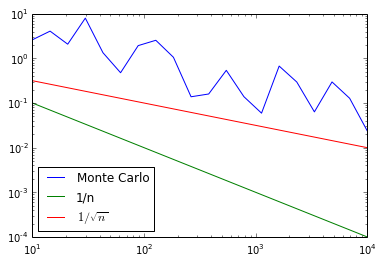

In [13]:
ns = logspace(1,4,20)
err = []
Is  = []
for n in ns:
    I = mc_int(disc_v,0,10, int(n))
    err.append(abs(I - Iexact))
    Is.append(I)
loglog(ns, err, label='Monte Carlo')
loglog(ns, 1/ns, label='1/n')
loglog(ns, 1/sqrt(ns), label='$1/\sqrt{n}$')
legend(loc=0);

Vemos que a convergência realmente parece seguir a velocidade indicada pelo TCL.

Apesar da sua lentidão, o método de Monte Carlo pode também servir para calcular a área $|D|$ da base.

Enfim, o Método de Monte Carlo é o mais simples de ser **continuado**.
Imagine que, após algum tempo, já calculamos o erro com alguma precisão.
Poderíamos continuar calculando
(se o computador não tiver nada melhor para fazer,
por exemplo porque está esperando uma decisão do usuário)
simplesmente sorteando mais pontos.

Assim, usando mais 10000 pontos sobre o último intervalo:

In [17]:
Ibis = mc_int(disc_v,0,10,10000)
Inew = (Ibis + Is[-1])/2
print(Inew - Iexact, 1/sqrt(20000))

-0.00555552423276 0.00707106781187


Não só isso, podemos também aproveitar pontos de cada um dos cálculos
(pois todos pontos foram aleatórios entre cada rodada - $h$):

In [18]:
nsum = sum(ns)
Isum = sum([i*n for n,i in zip(ns,Is)])/nsum
print(Isum - Iexact, 1/sqrt(nsum))

0.0290472356308 0.00552285479628


# Métodos de Gauss-Legendre

Até agora, os métodos de intervalo foram bastante simples:
usamos apenas subdivisões uniformes, e tomamos pontos "que fazem sentido".
Vimos que métodos que usam mais pontos convergem mais rápido,
se a função for suficientemente derivável.

Com os métodos adaptativos, nos preocupamos em calcular menos vezes uma função,
e reaproveitamos os métodos de intervalo como ferramenta de base.

Mas podemos calcular integrais com um pouco mais de método.
Se o nosso objetivo é minimizar o número de pontos em que calculamos a função,
podemos investigar o que acontece se, em vez de sempre usar os extremos,
pudermos usar **outros** pontos para as estimativas.

## Exemplo fundamental

Ainda seguindo a filosofia dos métodos de intervalo,
queremos achar uma regra que nos diga como aproximar a integral
$I_k = \int_{c_k}^{d_k} f(t) \, dt$ no pequeno intervalo $[c_k, d_k]$.

Com apenas um ponto no intervalo, não é difícil de se convencer que o ponto médio é o melhor deles:
ele fornece uma estimativa que cancela até a primeira ordem a variação da função.

Vamos ver o que acontece se tivermos _dois_ pontos.

Vamos nos concentrar no intervalo $[-1,1]$.
Qualquer outro intervalo pode ser obtido por uma translação e dilatação,
e usando este intervalo simétrico e simples podemos simplificar muitas contas!

Sejam, então, $x$ e $y$ dois pontos no intervalo $[-1,1]$.
Queremos aproximar $\int_{-1}^1 f(t)\, dt$ com uma combinação de $f(x)$ e $f(y)$.
Assim, façamos as contas.
Primeiro, expandimos $f(t)$ em série de Taylor até altas ordens:
$$ \int_{-1}^1 f(t) \, dt = 2 f(0) + \frac{2}{3} \frac{f''(0)}{2} + \frac{2}{5} \frac{f''''(0)}{4!} + \ldots $$
Em seguida, expandimos a nossa aproximação:
$$\begin{align*}
I & = af(x) + bf(y) \\
  & = a f(0) + b f(0) && = (a + b)f(0) \\
  & \quad + a x f'(0) + b y f'(0) && \quad + (ax + by)f'(0)\\
  & \quad + \big[ a x^2 f''(0) + b y^2 f''(0) \big]/2      && \quad + \big[ a x^2 + b y^2 \big] \frac{f''(0)}{2} \\
  & \quad + \big[ a x^3 f'''(0) + b y^3 f'''(0) \big]/6    && \quad + \big[ a x^3 + b y^3 \big] \frac{f'''(0)}{3!} \\
  & \quad + \big[ a x^4 f''''(0) + b y^4 f''''(0) \big]/24 && \quad + \big[ a x^4 + b y^4 \big] \frac{f''''(0)}{4!} \\
  & \quad + \ldots
\end{align*} $$


Daí, tiramos as equações, igualando os coeficientes das derivadas de $f$ em zero:
$$\begin{align*}
a    + b    & = 2 \\
ax   + by   & = 0 \\
ax^2 + by^2 & = \frac{2}{3} \\
ax^3 + by^3 & = 0 \\
ax^4 + by^4 & = \frac{2}{5}
\end{align*}$$

Agora, basta resolvê-las!
Usando as equações de grau ímpar primeiro, vemos que
$$ ax(x^2 - y^2) = 0.$$
Isso nos dá 4 possibilidades:
$a = 0$, $x = 0$, $x = y \neq 0$ e $x = -y \neq 0$.

1. Se $a = 0$, temos $b = 2$, $by = 0$ e $by^2 = \frac{2}{3}$, o que é absurdo.
    Podemos satisfazer, no máximo, as duas primeiras equações.
2. Se $x = 0$, temos $by = 0$ e $by^2 = \frac{2}{3}$, logo novamente podemos satisfazer no máximo as duas primeiras.
3. Se $x = y \neq 0$, temos $a + b = 2$ e $a + b = 0$. Podemos satisfazer no máximo a primeira equação!
4. Enfim, se $x = -y$, satisfazemos sempre as equações de grau ímpar tomando $a = b$ (o que é necessário para a primeira delas).
    De $a + b = 2$ temos $a = b = 1$, e enfim temos uma equação para $x$ (e portanto $y$):
    $$ ax^2 + a(-x)^2 = \frac{2}{3} \Rightarrow 2x^2 = \frac{2}{3} \Rightarrow x = \frac{1}{\sqrt{3}} $$.
    Podemos, assim, satisfazer **quatro** equações!
    Mais ainda, o erro de aproximação será
    $$ \big[ 2ax^4 - 2/5 \big] \frac{f''''(0)}{4!}
        = \big[ 2/9 - 2/5 \big] \frac{f''''(0)}{4!}
        = \frac{-8}{45} \frac{f''''(0)}{4!} $$

Esta escolha de pontos é conhecida como **pontos de Gauss-Legendre**.

In [19]:
def gausslegendre2(f,a,b,n):
    h = (b-a)/float(n)
    amid = a + h/2
    aleft  = amid - h/2/sqrt(3)
    aright = amid + h/2/sqrt(3)
    
    fl = [f(aleft  + i*h) for i in range(n)]
    fr = [f(aright + i*h) for i in range(n)]
    
    return (sum(fl) + sum(fr))*h/2

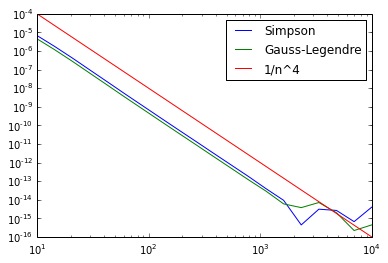

In [20]:
ns = logspace(1,4,20)
err_simp  = []
err_gauss = []
for n in ns:
    I = IM.simpson(sin,0,pi, int(n))
    err_simp.append(abs(I - 2))
    I = gausslegendre2(sin,0,pi, int(n))
    err_gauss.append(abs(I - 2))
    
loglog(ns, err_simp, label='Simpson')
loglog(ns, err_gauss, label='Gauss-Legendre')
loglog(ns, 1/ns**4, label='1/n^4')
legend(loc=0);

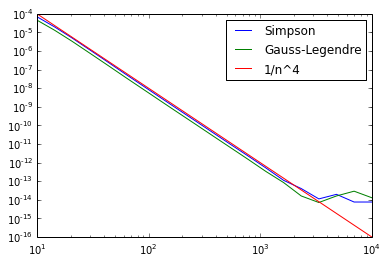

In [23]:
def es(x): return exp(x)*sin(x)
def prim_es(x): return exp(x)*(sin(x) - cos(x))/2

ns = logspace(1,4,20)
err_simp  = []
err_gauss = []
Iexact = prim_es(4) - prim_es(0)
for n in ns:
    I = IM.simpson(es,0,4, int(n))
    err_simp.append(abs(I - Iexact))
    I = gausslegendre2(es,0,4, int(n))
    err_gauss.append(abs(I - Iexact))
    
loglog(ns, err_simp, label='Simpson')
loglog(ns, err_gauss, label='Gauss-Legendre')
loglog(ns, 1/ns**4, label='1/n^4')
legend(loc=0);